In [ ]:
# Softmax classification (you do not have to do anything in this cell)

# import the libraries that we will need
from sklearn.datasets import fetch_openml  # !!! make sure you check out                                           
import numpy as np                         # openml.org for more datasets!
import matplotlib.pyplot as plt
%matplotlib inline

# Now we load the MNIST dataset using openml
mnist = fetch_openml('mnist_784', cache=False)  # !!! make sure you check out
                                                # openml.org for more datasets!
X = mnist.data
y = mnist.target

# let's normalize X so that all values are between zero and one
X = X/np.max(X)

# let's convert y into a sparse matrix
Ndatapoints = y.shape[0]
Nlabels = len(np.unique(y))
y_sparse = np.zeros([Ndatapoints, Nlabels])
for i in range(Ndatapoints):
  y_sparse[i, int(y[i])] = 1
y = y_sparse

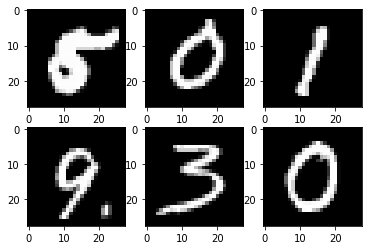

In [ ]:
# now we split the data (you do not have to do anything in this cell)

# because we want to use cross validation, 
# we randomly select 10% as test, 10% as validation, and 80% as training
Ntotal = X.shape[0]
Ntest_val = int(Ntotal/5)
Nval = Ntest_val/2
Ntrain = Ntotal - Ntest_val

# now let's generate the indices for the test and val
test_val_idx = np.random.choice(range(Ntotal),Ntest_val,replace=False)
test_idx = test_val_idx[:int(Ntest_val/2)]
val_idx = test_val_idx[int(Ntest_val/2):]

X_ts = X[test_idx]
y_ts = y[test_idx]
X_vl = X[val_idx]
y_vl = y[val_idx]
X_tr = np.delete(X, test_val_idx, axis=0)
y_tr = np.delete(y, test_val_idx, axis=0)

# we forget about the testing data for now

# let's visualize six examples in the training set
Nexamples = 6
example_idxs = np.random.choice(Ntrain,Nexamples,replace=False)
for i, iexample in enumerate(example_idxs):
  plt.subplot(2,3,i+1)
  plt.imshow(np.reshape(X_tr[iexample],[28,28]),cmap='gray')
plt.show()

In [ ]:
# some variables that we will need
Ntrain = X_tr.shape[0]
Nfeatures = X.shape[1]
Nclasses = y_sparse.shape[1]
Nval = X_vl.shape[0]

# initialize W to be a matrix drawn from a random uniform distribution 
# with zero mean and a small variance
W = np.random.uniform(0.0, 1.0, size = (Nfeatures, Nclasses))
# initialize b to be a vector of zeros
b = np.zeros(Nclasses)

def softmax (tetta):
  result = tetta
 
  for iscore in range(tetta.shape[0]):
    isum = sum(np.exp(tetta[iscore,:]))
 
    for i in range(tetta.shape[1]):
      result[iscore, i] = np.exp(tetta[iscore, i]) / isum
  return result

# now we can get y_hat for the training data
scores = np.dot(X_tr, W) + b
y_hat = softmax(scores)

# define the learning rate and regularization strength
learning_rate = 0.001
# value of it? 
reg_str = 0.0001

# now we put everything in a for loop, so that we can repeat the process
Niters = 1000

for iter in range(Niters):
  # calculate the y_hat 
  # for the training set
  scores = np.dot(X_tr, W) + b
  y_hat = softmax(scores)
  # and also the cost function with L2 regularization applied to W

  # change minus to plus and try to use reg str 
  J = (-1 / Ntrain) * sum((y_tr) * np.log(y_hat)) + 1/2 * reg_str
  
  # now do the same for the validation set
  scores = np.dot(X_vl, W) + b
  y_hat_vl = softmax(scores)
  # and also the cost function
  J_vl = (-1 / Nval) * sum((y_vl) * np.log(y_hat_vl)) + 1/2 * reg_str

  # update the b and W
  dJdscores = y_hat - y_tr
  dJdb = np.dot(np.ones((1, Ntrain)), (dJdscores))
  dJdW = (1 / Ntrain) * np.dot(np.transpose(X_tr), (dJdscores))
  b = b - learning_rate * dJdb
  W = W - learning_rate * dJdW

  print('At iteration No. ' + str(iter) + ' ,the cross-entropy (training) cost is: ', J)
  print('------------------------------ the cross-entropy (validation) cost is: ', J_vl)

At iteration No. 0 ,the cross-entropy (training) cost is:  [0.92206148 0.31341821 0.68869721 0.84574403 0.36366276 0.4143175
 0.43586584 0.26454127 0.44033236 0.21221972]
------------------------------ the cross-entropy (validation) cost is:  [0.87430457 0.32137102 0.65181063 0.78385069 0.37879235 0.38700776
 0.44235916 0.28219897 0.41529963 0.22838856]
At iteration No. 1 ,the cross-entropy (training) cost is:  [0.58709238 0.64211434 0.18434678 0.3601749  0.37691863 0.63682622
 0.51134226 0.84299487 0.29819479 1.09158534]
------------------------------ the cross-entropy (validation) cost is:  [0.56195242 0.66029364 0.1740612  0.3297763  0.39419331 0.59356286
 0.53438645 0.87641917 0.27855246 1.17886626]
At iteration No. 2 ,the cross-entropy (training) cost is:  [0.82831312 0.17967247 1.23217297 0.9740233  0.40750649 0.55593496
 0.27276337 0.30398502 0.55002866 0.61291271]
------------------------------ the cross-entropy (validation) cost is:  [0.78411012 0.18183537 1.17097802 0.9050562

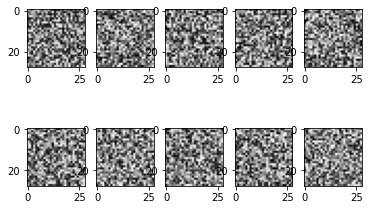

In [ ]:
# now let's visualize the weights for each class (you do not have to do anything here)
for i in range(Nclasses):
  plt.subplot(2,5,i+1)
  plt.imshow(np.reshape(W[:,i],[28,28]),cmap='gray')
plt.show()

In [ ]:
# now we calculate the accuracy (you do not have to do anything here)

y_hat_index = np.argmax(y_hat,axis=1)
y_hat_vl_index = np.argmax(y_hat_vl,axis=1)
y_tr_index = np.argmax(y_tr,axis=1)
y_vl_index = np.argmax(y_vl,axis=1)

print('The training accuracy is: ', np.sum(y_tr_index==y_hat_index)/Ntrain)
print('The validation accuracy is: ', np.sum(y_vl_index==y_hat_vl_index)/Nval)

The training accuracy is:  0.18471428571428572
The validation accuracy is:  0.18857142857142858


In [ ]:
# more things to try:
# - I would like to try do these tasks,
# but have a lot to do in the final project 

# implement L1 regularization of W

# Get the best validation accuracy by trying out different learning rate
# regularization strength, initial conditions for b and W, 
# changing the statistics of the input

# can you bring the training accuracy to 100%? If you do everything right
# and you do not worry about the validation accuracy, you should be able to
# bring the training accuracy to 100% and the training cost very close to 0
# hint: you will have to change the size of the training set to do this

# what is happening when you bring the training accuracy to 100%? 
# What happened to the validation accuracy? Can you bring both the training 
# and validation accuracy to 100%?

# how do you know when to stop your training? define a rule to stop your
# training, and substitute the for loop for a while loop

# once you find the absolue best model, check the test accuracy. 
# do this only once. Doing it more than one time is bad practice and makes
# your cross-validation efforts useless.